In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_csv('/content/brain_stroke.csv')
df = data.copy()
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
5,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
6,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
7,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1
8,Female,81.0,1,0,Yes,Private,Rural,80.43,29.7,never smoked,1
9,Female,61.0,0,1,Yes,Govt_job,Rural,120.46,36.8,smokes,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [4]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


In [6]:
df.shape

(4981, 11)

In [7]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Plotting the data to find the distribution among them

<ipython-input-8-b663aa9e13fb>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,3,idx+1)


[]

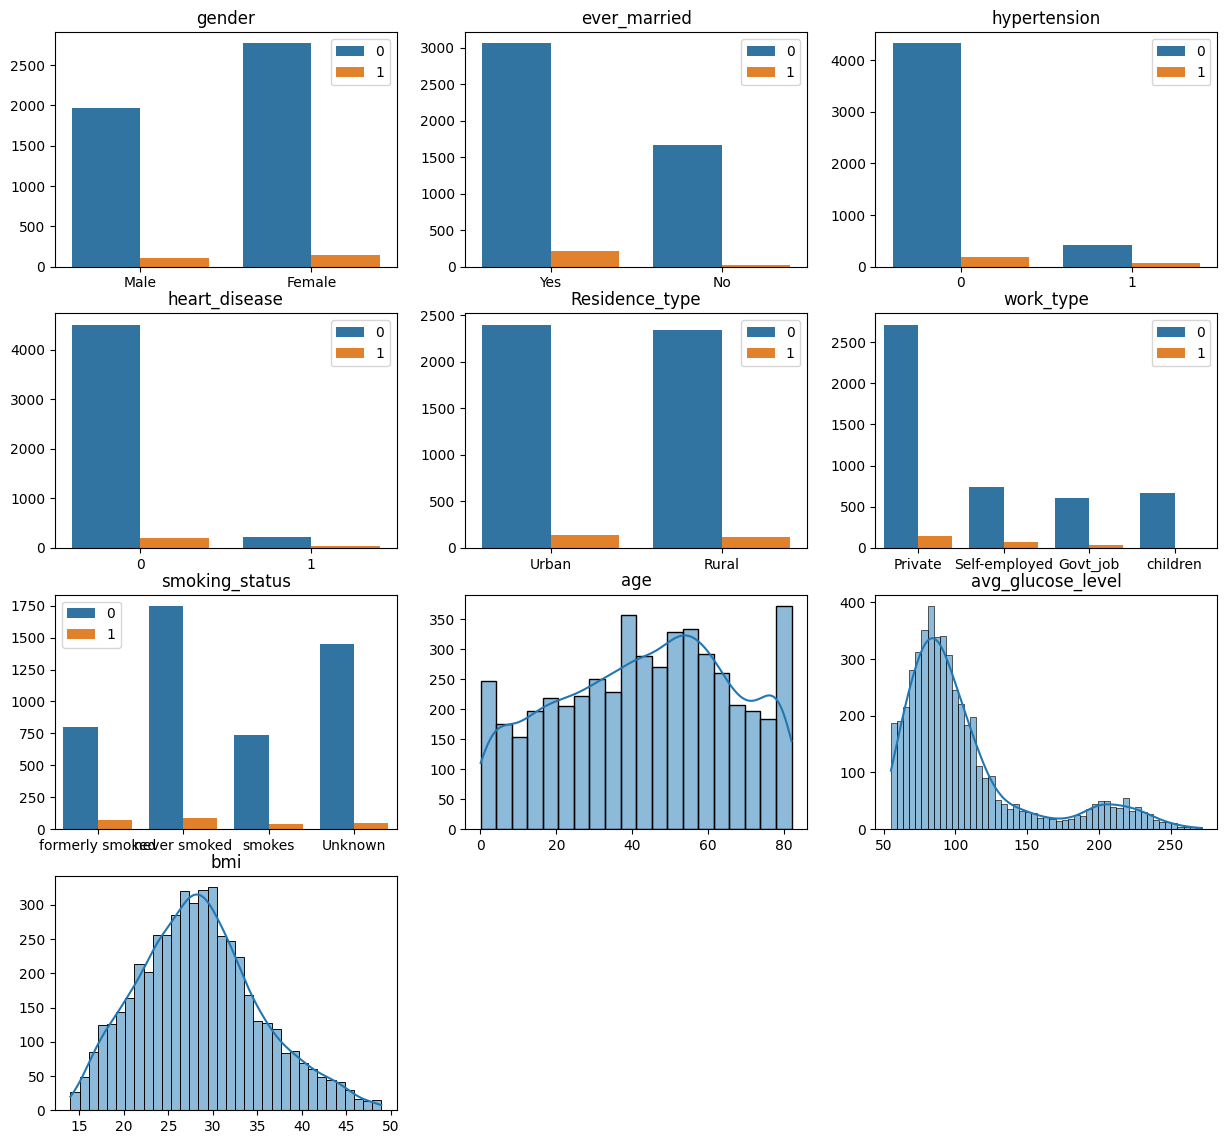

In [8]:
object_cols = ['gender', 'ever_married','hypertension', 'heart_disease', 'Residence_type','work_type','smoking_status']
num_cols = ['age', 'avg_glucose_level', 'bmi']
fig,ax = plt.subplots(figsize = (15, 14))
idx = 0
for i in object_cols:
    plt.subplot(4,3,idx+1)
    sns.countplot(x = i, data = df, hue = df['stroke'])
    plt.xlabel(None)
    plt.ylabel(None)
    plt.title(i)
    plt.legend()
    idx += 1

for i in num_cols:
    plt.subplot(4,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1

plt.plot()

Plot the box plot of the numerical columns

The number of the outliers of the age column is : 0
The number of the outliers of the avg_glucose_level column is : 602
The number of the outliers of the bmi column is : 43


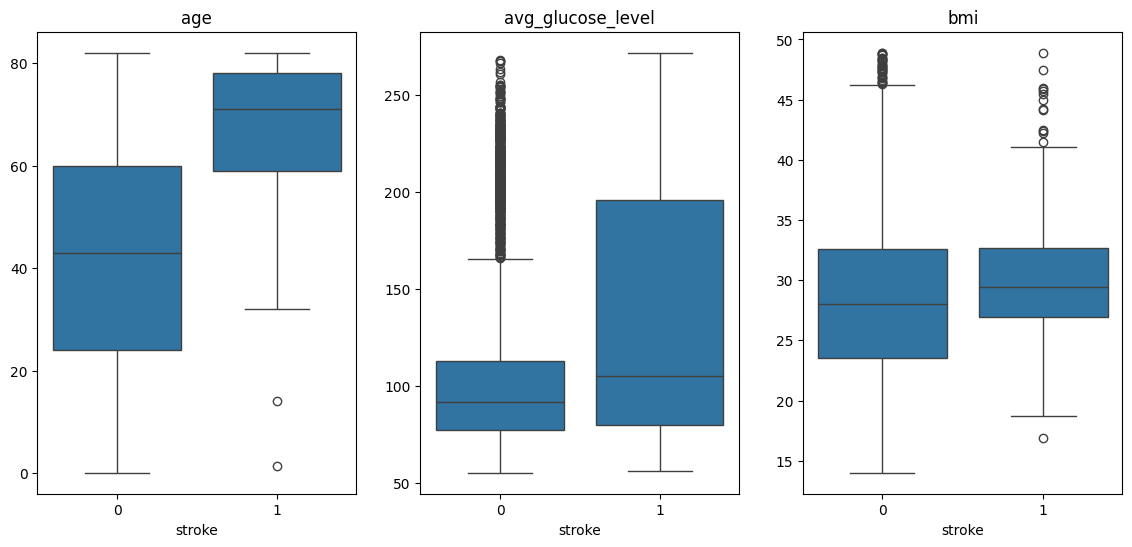

In [9]:
plt.figure(figsize = (14, 6))
for i in range(0, len(num_cols)):
    plt.subplot(1,3,i + 1)
    sns.boxplot(data = df, y = num_cols[i], x = 'stroke')
    plt.ylabel(None)
    plt.title(num_cols[i])

plt.plot()

def check_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    IQR = q3 - q1
    outliers = df[((df<(q1 - 1.5*IQR))|(df>(q3 + 1.5*IQR)))]
    return outliers

# Print the number of the outliers in the 3 cols:
for i in range(0, len(num_cols)):
    print(f'The number of the outliers of the {num_cols[i]} column is : {len(check_outliers(df[num_cols[i]]))}')

Biased/Balanced

In [10]:
df['stroke'].value_counts()

stroke
0    4733
1     248
Name: count, dtype: int64

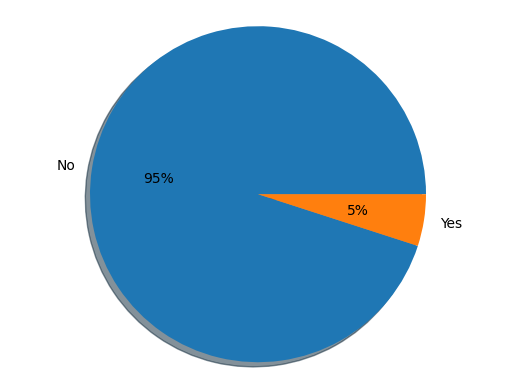

In [11]:
x, y= df['stroke'].value_counts()

classs = [x, y]
class_labels = ["No", "Yes"]
plt.pie(classs, labels = class_labels, autopct = '%0.0f%%', shadow = True)
plt.axis("equal")
plt.show()

Using label encoder to labelling the object_type data

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in object_cols:
    df[i] = le.fit_transform(df[i])

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [13]:
df_corr = df.corr(method="spearman")
df_corr

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
gender,1.000000,-0.018037,0.021485,0.086476,-0.028971,0.053937,-0.004301,0.049636,0.011811,-0.062905,0.008870
age,-0.018037,1.000000,0.282577,0.271159,0.661365,-0.286391,0.016859,0.142399,0.376880,0.233049,0.251262
hypertension,0.021485,0.282577,1.000000,0.111974,0.164534,-0.037634,-0.004755,0.110959,0.168850,0.107850,0.131965
heart_disease,0.086476,0.271159,0.111974,1.000000,0.114765,-0.018192,0.002125,0.109575,0.076483,0.046452,0.134610
ever_married,-0.028971,0.661365,0.164534,0.114765,1.000000,-0.335249,0.008191,0.094302,0.386216,0.256635,0.108398
work_type,0.053937,-0.286391,-0.037634,-0.018192,-0.335249,1.000000,-0.002621,-0.020381,-0.322357,-0.303646,-0.026442
Residence_type,-0.004301,0.016859,-0.004755,0.002125,0.008191,-0.002621,1.000000,-0.009397,0.007720,0.010183,0.016494
avg_glucose_level,0.049636,0.142399,0.110959,0.109575,0.094302,-0.020381,-0.009397,1.000000,0.121999,0.036274,0.082897
bmi,0.011811,0.376880,0.168850,0.076483,0.386216,-0.322357,0.007720,0.121999,1.000000,0.237034,0.062258
smoking_status,-0.062905,0.233049,0.107850,0.046452,0.256635,-0.303646,0.010183,0.036274,0.237034,1.000000,0.025732


<Axes: >

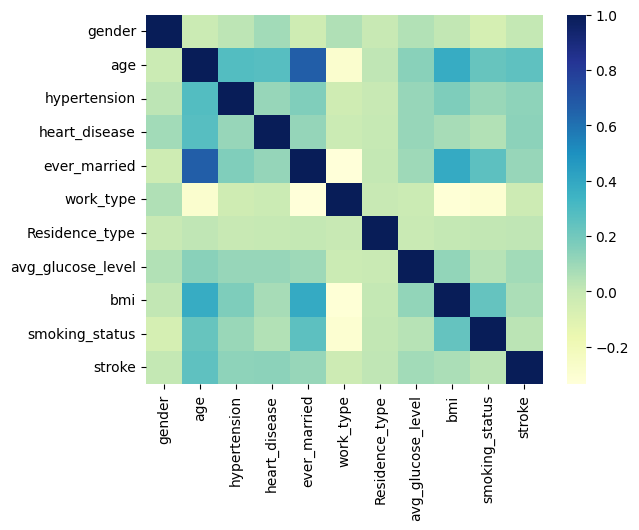

In [14]:
sns.heatmap(df_corr, cmap = 'YlGnBu')

HistoGraph

<Axes: ylabel='Count'>

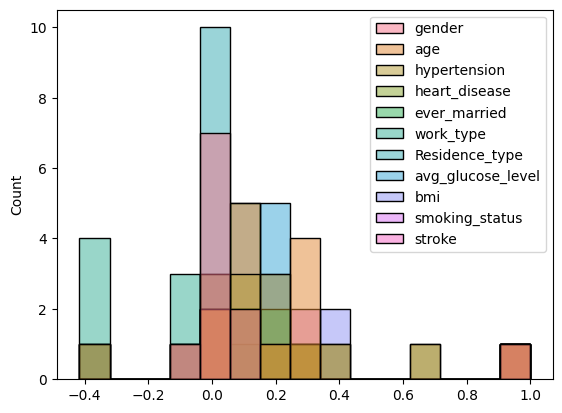

In [15]:
sns.histplot(data=df.corr())

Drop Irrelavent Features

In [16]:
df = df.drop(['gender'],axis=1)
df = df.drop(['Residence_type'],axis=1)

In [17]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,67.0,0,1,1,1,228.69,36.6,1,1
1,80.0,0,1,1,1,105.92,32.5,2,1
2,49.0,0,0,1,1,171.23,34.4,3,1
3,79.0,1,0,1,2,174.12,24.0,2,1
4,81.0,0,0,1,1,186.21,29.0,1,1


Rescale the numerical data

[]

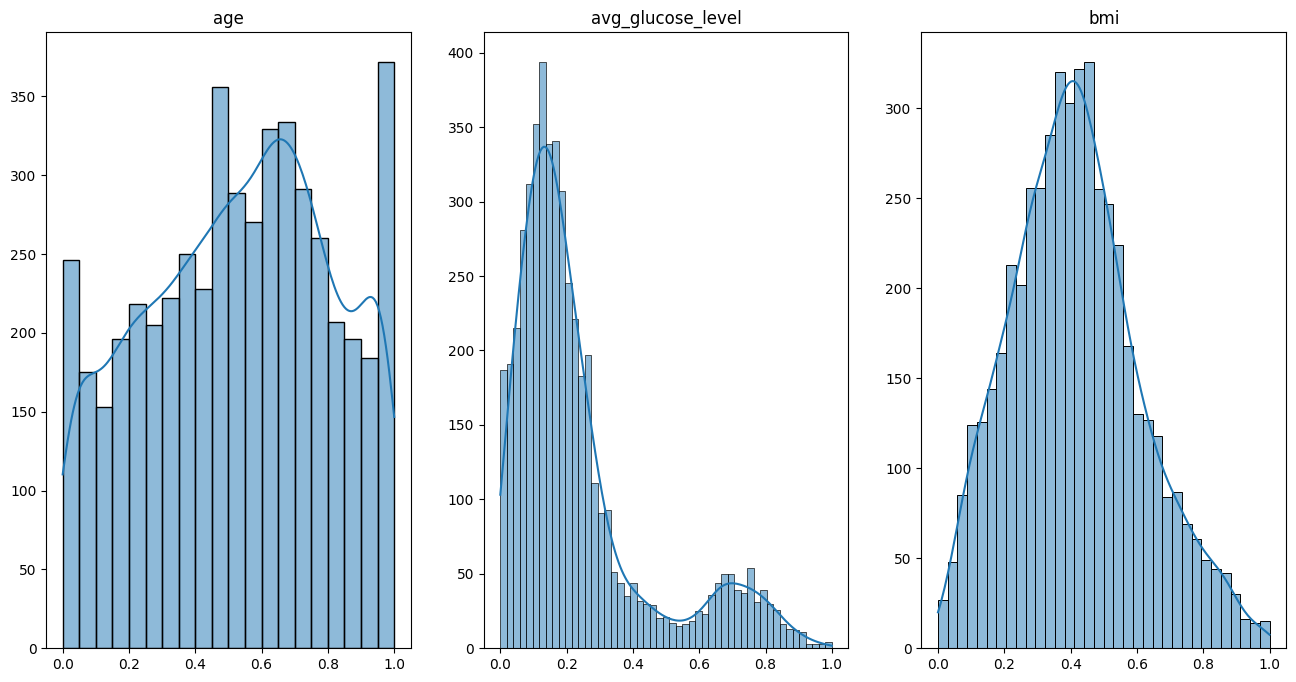

In [24]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
mm = MinMaxScaler()
rs = RobustScaler()
ss = StandardScaler()

df['age'] = mm.fit_transform(df[['age']])
df['bmi'] = mm.fit_transform(df[['bmi']])
df['avg_glucose_level'] = mm.fit_transform(df[['avg_glucose_level']])

# Plot the distribution of the data after rescale
plt.figure(figsize = (16, 8))
idx = 0
for i in num_cols:
    plt.subplot(1,3,idx+1)
    sns.histplot(x = df[i],kde = True)
    plt.ylabel(None)
    plt.title(i)
    plt.xlabel(None)
    idx+=1

plt.plot()

In [25]:
df.head()

,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.816895,0,1,1,1,0.801265,0.647564,1,1
1,0.975586,0,1,1,1,0.234512,0.530086,2,1
2,0.597168,0,0,1,1,0.536008,0.584527,3,1
3,0.963379,1,0,1,2,0.549349,0.286533,2,1
4,0.987793,0,0,1,1,0.605161,0.429799,1,1


Split the data into train and test

In [26]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop(columns=['stroke'])
y = df['stroke']
s1=SMOTE()

x_data,y_data=s1.fit_resample(X,y)

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state = 37)

print(x_train.shape, x_test.shape)

(6626, 8) (2840, 8)


Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

In [28]:
print("Training accuracy of the model is {:.2f}".format(gnb.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(gnb.score(x_test, y_test)))

Training accuracy of the model is 0.75
Testing accuracy of the model is 0.76


In [29]:
nb_predictions = gnb.predict(x_test)
print(nb_predictions)

[1 0 1 ... 0 1 1]


In [30]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(nb_predictions, y_test)
print(mat)

[[1041  290]
 [ 395 1114]]


<Axes: >

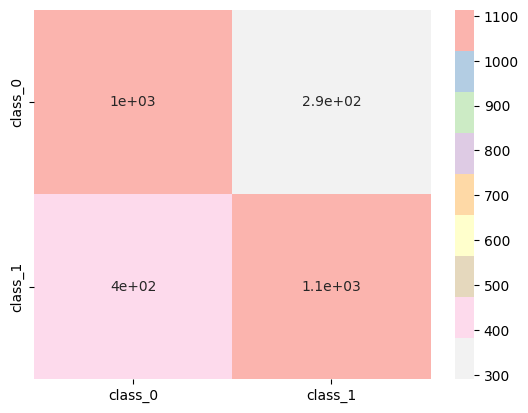

In [33]:
from seaborn import heatmap
heatmap(mat, cmap="Pastel1_r", xticklabels=['class_0', 'class_1' ], yticklabels=['class_0', 'class_1'], annot=True)

Random Forrest (A bunch of desicion trees)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(n_estimators=50)

In [35]:
print("The Training accuracy of the model is {:.2f}".format(rfc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(rfc.score(x_test, y_test)))

The Training accuracy of the model is 1.00
The Testing accuracy of the model is 0.91


In [36]:
rf_predictions = rfc.predict(x_test)
print(rf_predictions)

[1 0 1 ... 0 0 1]


In [37]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(rf_predictions, y_test)
print(mat)

[[1268   75]
 [ 168 1329]]


<Axes: >

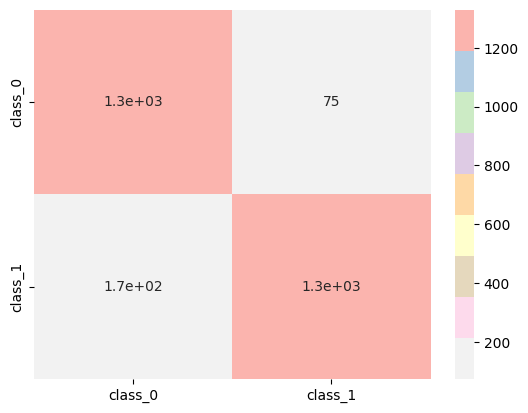

In [38]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'], annot=True)

SVM

In [39]:
from sklearn.svm import SVC
svc = SVC(kernel="linear")
svc.fit(x_train, y_train)

SVC(kernel='linear')

In [40]:
print("Training accuracy of the model is {:.2f}".format(svc.score(x_train, y_train)))
print("Testing accuracy of the model is {:.2f}".format(svc.score(x_test, y_test)))

Training accuracy of the model is 0.78
Testing accuracy of the model is 0.79


In [41]:
svc_predictions = svc.predict(x_test)
print(svc_predictions)

[1 0 1 ... 0 1 1]


In [42]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(svc_predictions, y_test)
print(mat)

[[1056  211]
 [ 380 1193]]


<Axes: >

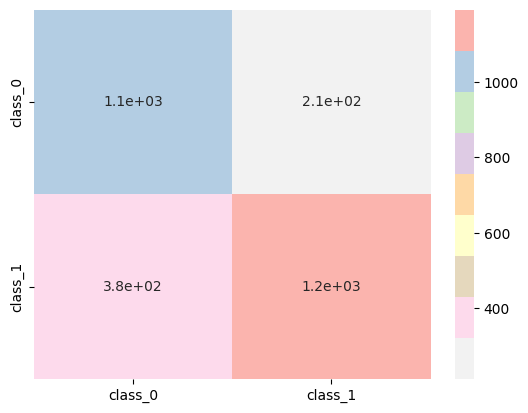

In [44]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0', 'class_1' ], yticklabels=['class_0', 'class_1'], annot=True)

Neural Network Classifier

In [54]:
from sklearn.neural_network import MLPClassifier
nnc=MLPClassifier(hidden_layer_sizes=(7), activation="relu", max_iter=10000)

In [55]:
nnc.fit(x_train, y_train)

MLPClassifier(hidden_layer_sizes=7, max_iter=10000)

In [56]:
print("The Training accuracy of the model is {:.2f}".format(nnc.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(nnc.score(x_test, y_test)))

The Training accuracy of the model is 0.78
The Testing accuracy of the model is 0.80


In [57]:
nnc_predictions = nnc.predict(x_test)
print(nnc_predictions)

[1 0 1 ... 0 1 1]


In [64]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(nnc_predictions, y_test)
print(mat)

[[1040  179]
 [ 396 1225]]


<Axes: >

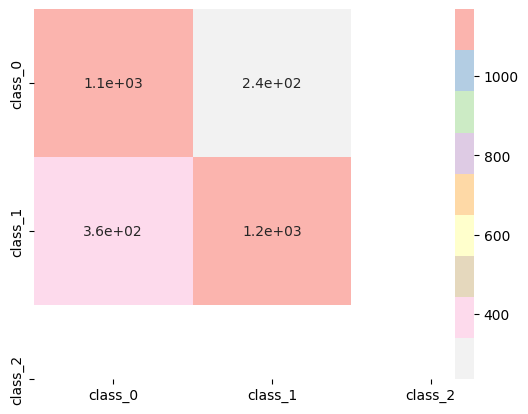

In [66]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000)
log.fit(x_train, y_train)

LogisticRegression(max_iter=10000)

In [62]:
print("The Training accuracy of the model is {:.2f}".format(log.score(x_train, y_train)))
print("The Testing accuracy of the model is {:.2f}".format(log.score(x_test, y_test)))

The Training accuracy of the model is 0.78
The Testing accuracy of the model is 0.79


In [63]:
log_predictions = log.predict(x_test)
print(log_predictions)

[1 0 1 ... 0 1 1]


In [65]:
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(log_predictions, y_test)
print(mat)

[[1071  235]
 [ 365 1169]]


<Axes: >

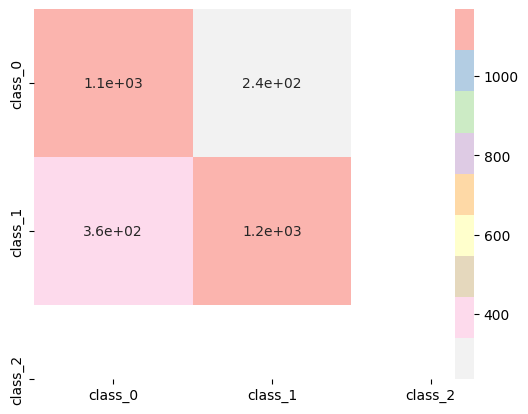

In [67]:
from seaborn import heatmap
heatmap(mat , cmap="Pastel1_r", xticklabels=['class_0' ,'class_1' ,'class_2'], yticklabels=['class_0' ,'class_1', 'class_2'], annot=True)

Result Calculation

In [45]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

Naive Bayes

In [46]:
nb_result = classification_report(y_test, nb_predictions)
print(nb_result)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print(nb_accuracy)

              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1436
           1       0.74      0.79      0.76      1404

    accuracy                           0.76      2840
   macro avg       0.76      0.76      0.76      2840
weighted avg       0.76      0.76      0.76      2840

0.7588028169014085


SVM

In [47]:
svc_result = classification_report(y_test, svc_predictions)
print(svc_result)
svc_accuracy = accuracy_score(y_test, svc_predictions)
print(svc_accuracy)

              precision    recall  f1-score   support

           0       0.83      0.74      0.78      1436
           1       0.76      0.85      0.80      1404

    accuracy                           0.79      2840
   macro avg       0.80      0.79      0.79      2840
weighted avg       0.80      0.79      0.79      2840

0.7919014084507042


Random Forrest

In [48]:
rf_result = classification_report(y_test, rf_predictions)
print(rf_result)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(rf_accuracy)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91      1436
           1       0.89      0.95      0.92      1404

    accuracy                           0.91      2840
   macro avg       0.92      0.91      0.91      2840
weighted avg       0.92      0.91      0.91      2840

0.9144366197183098


Neural Network Classifier

In [80]:
nnc_result = classification_report(y_test, nnc_predictions)
print(nnc_result)
nnc_accuracy = accuracy_score(y_test, nnc_predictions)
print(nnc_accuracy)

              precision    recall  f1-score   support

           0       0.85      0.72      0.78      1436
           1       0.76      0.87      0.81      1404

    accuracy                           0.80      2840
   macro avg       0.80      0.80      0.80      2840
weighted avg       0.80      0.80      0.80      2840

0.7975352112676056


Logistic Regression

In [81]:
log_result = classification_report(y_test, log_predictions)
print(log_result)
log_accuracy = accuracy_score(y_test, log_predictions)
print(log_accuracy)

              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1436
           1       0.76      0.83      0.80      1404

    accuracy                           0.79      2840
   macro avg       0.79      0.79      0.79      2840
weighted avg       0.79      0.79      0.79      2840

0.7887323943661971


Accuracy

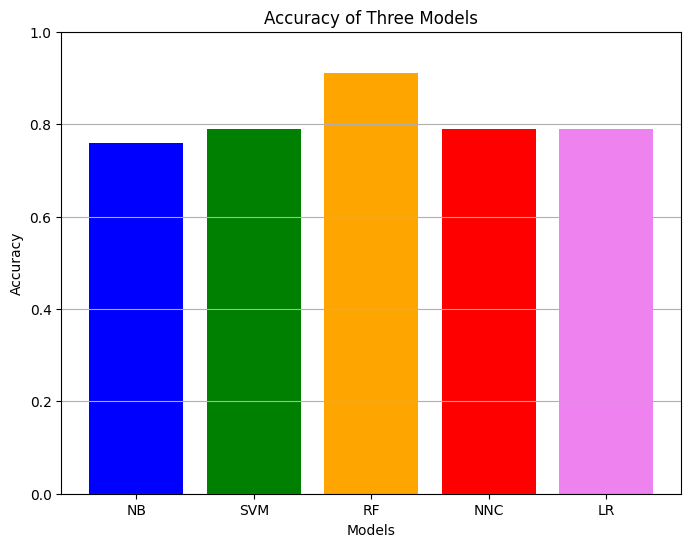

In [83]:
data = {
    'Model': ['NB', 'SVM', 'RF', 'NNC', 'LR'],
    'Accuracy': [0.76, 0.79, 0.91, 0.79, 0.79]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Accuracy'], color=['blue', 'green', 'orange', 'red', 'violet'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Three Models')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy range
plt.grid(axis='y')  # Adding gridlines for better readability
plt.show()

Precision

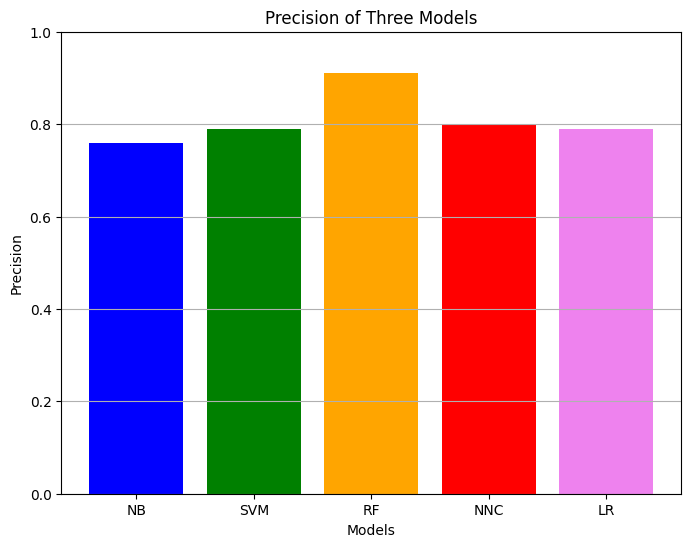

In [85]:
data = {
    'Model': ['NB', 'SVM', 'RF', 'NNC', 'LR'],
    'Precision': [0.76, 0.79, 0.91, 0.80, 0.79]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Precision'], color=['blue', 'green', 'orange', 'red', 'violet'])
plt.xlabel('Models')
plt.ylabel('Precision')
plt.title('Precision of Three Models')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy range
plt.grid(axis='y')  # Adding gridlines for better readability
plt.show()

Recall

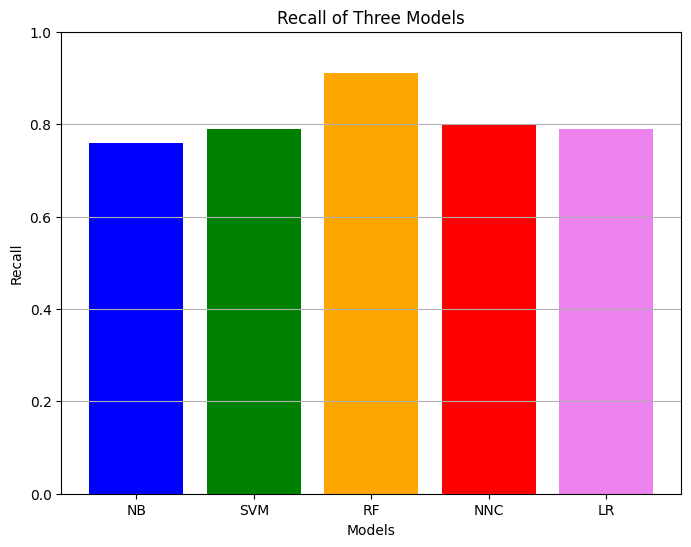

In [87]:
data = {
    'Model': ['NB', 'SVM', 'RF', 'NNC', 'LR'],
    'Recall': [0.76, 0.79, 0.91, 0.80, 0.79]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['Recall'], color=['blue', 'green', 'orange', 'red', 'violet'])
plt.xlabel('Models')
plt.ylabel('Recall')
plt.title('Recall of Three Models')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy range
plt.grid(axis='y')  # Adding gridlines for better readability
plt.show()

F1 Score

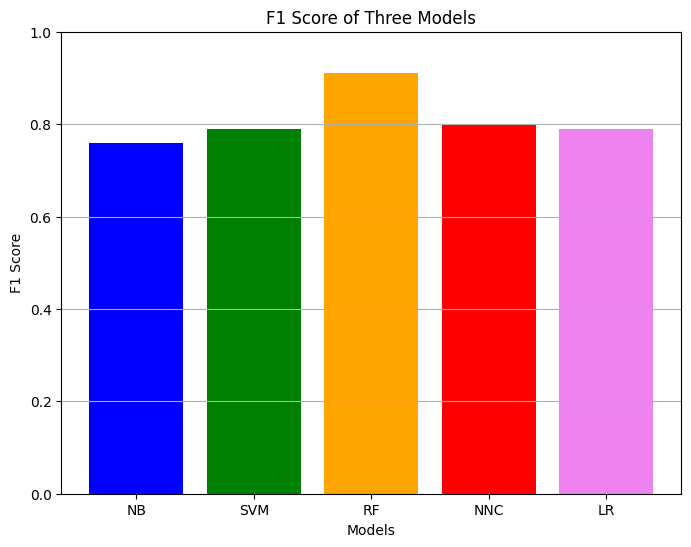

In [88]:
data = {
    'Model': ['NB', 'SVM', 'RF', 'NNC', 'LR'],
    'F1 Score': [0.76, 0.79, 0.91, 0.80, 0.79]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(df['Model'], df['F1 Score'], color=['blue', 'green', 'orange', 'red', 'violet'])
plt.xlabel('Models')
plt.ylabel('F1 Score')
plt.title('F1 Score of Three Models')
plt.ylim(0, 1)  # Setting y-axis limit to 0 to 1 for accuracy range
plt.grid(axis='y')  # Adding gridlines for better readability
plt.show()